# Keras -  pretrained models and transfer learning

In [42]:
import keras
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

from keras.applications import vgg16,inception_v3

In [43]:
vgg_model = vgg16.VGG16(weights ='imagenet')
inception_model = inception_v3.InceptionV3(weights='imagenet')

In [44]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [45]:
filename = '../DataScience/learnopencv-master/Keras-ImageNet-Models/images/cat.jpg'

('PIL image size', (224, 224))


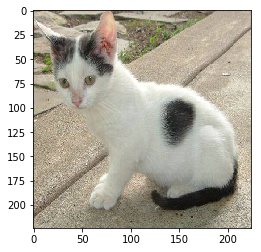

In [46]:
original = load_img(filename,target_size=(224,224))
print("PIL image size", original.size)
plt.imshow(original)
plt.show()

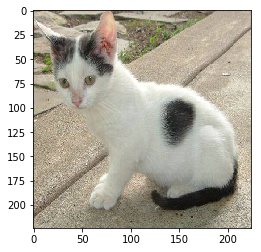

('Numpy image size', (224, 224, 3))
('image batch size', (1, 224, 224, 3))


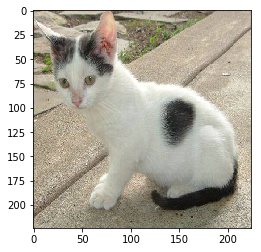

In [39]:
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print("Numpy image size", numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image,axis=0)
print("image batch size", image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [40]:
processed_image = vgg16.preprocess_input(image_batch.copy())
predictions = vgg_model.predict(processed_image)
label_vgg = decode_predictions(predictions)
label_vgg

[[(u'n02123597', u'Siamese_cat', 0.30934173),
  (u'n01877812', u'wallaby', 0.080341272),
  (u'n02326432', u'hare', 0.075098492),
  (u'n02325366', u'wood_rabbit', 0.050530687),
  (u'n03223299', u'doormat', 0.048173629)]]

In [41]:
original = load_img(filename,target_size=(299,299))
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)
processed_image = inception_v3.preprocess_input(image_batch.copy())
predictions = inception_model.predict(processed_image)
label_incep = decode_predictions(predictions)
label_incep

[[(u'n02124075', u'Egyptian_cat', 0.66225916),
  (u'n02123045', u'tabby', 0.050285082),
  (u'n02123597', u'Siamese_cat', 0.036381535),
  (u'n02123159', u'tiger_cat', 0.02352237),
  (u'n03223299', u'doormat', 0.015205652)]]

## Tranfer learning